# <font style="color:blue">Project 3: Object Detection</font>


#### Maximum Points: 100

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Plot Ground Truth Bounding Boxes</h3></td> <td><h3>20</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Training</h3></td> <td><h3>25</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Inference</h3></td> <td><h3>15</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>COCO Detection Evaluation</h3></td> <td><h3>25</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Run Inference on a Video</h3></td> <td><h3>15</h3></td> </tr>
    </table>
</div>


# <font style="color:purple">Download the Dataset</font> 

**[Download the Vehicle registration plate](https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1)**


Download the Vehicle Registration Plate dataset from [here](https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1) and unzip it. 

We will have the following directory structure:

```
Dataset
├── train
│   └── Vehicle registration plate
│       └── Label
└── validation
    └── Vehicle registration plate
        └── Label
```

Unzipping the file will give you a directory `Dataset`. This directory has two folder `train` and `validation`. Each train and validation folder has `Vehicle registration plate`  folder with `.jpg` images and a folder `Labels`.  `Labels` folder has bounding box data for the images.


For example,
For image: `Dataset/train/Vehicle registration plate/bf4689922cdfd532.jpg`
Label file is  `Dataset/train/Vehicle registration plate/Label/bf4689922cdfd532.txt`

There are one or more lines in each `.txt` file. Each line represents one bounding box.
For example,
```
Vehicle registration plate 385.28 445.15 618.24 514.225
Vehicle registration plate 839.68 266.066462 874.24 289.091462
```

We have a single class detection (`Vehicle registration plate detection`) problem. So bounding box details start from the fourth column in each row.

Representation is in `xmin`, `ymin`, `xmax`, and `ymax` format.

**It has `5308` training and `386` validation dataset.**

Data is downloaded from [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)

#  <font style="color:green">1. Plot Ground Truth Bounding Boxes [20 Points]</font> 

**You have to show three images from validation data with the bounding boxes.**

The plotted images should be similar to the following:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g1.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g2.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g3.png'>



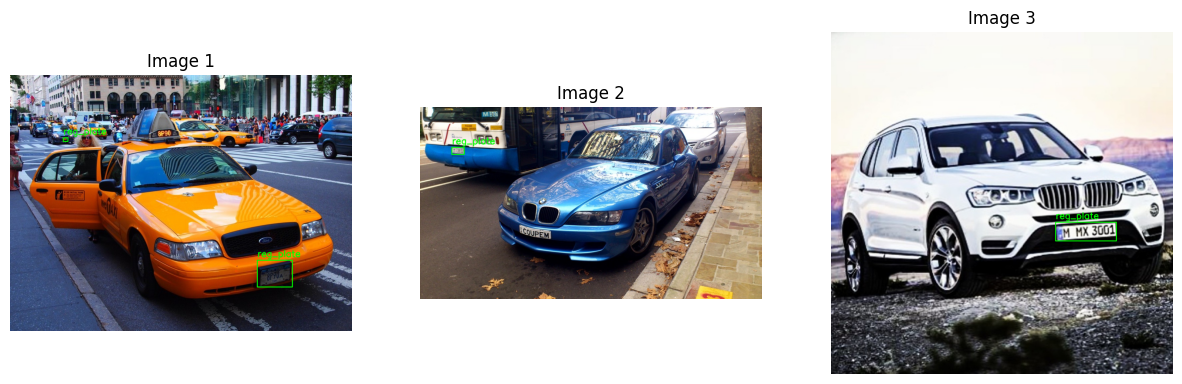

In [2]:
import os
import glob
import cv2
import matplotlib.pyplot as plt

# Function to read and process each label file
def read_label_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        boxes = []
        for line in lines:
            parts = line.strip().split()
            x_min = float(parts[3])
            y_min = float(parts[4])
            x_max = float(parts[5])
            y_max = float(parts[6])
            boxes.append((x_min, y_min, x_max, y_max))
    return boxes

# Function to draw bounding boxes on an image
def draw_bounding_boxes(image_path, boxes):
    image = cv2.imread(image_path)
    label='reg_plate'
    for (x_min, y_min, x_max, y_max) in boxes:
        cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
        cv2.putText(image, label, (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image

# Paths to the validation directories
validation_dir = '/kaggle/input/object-dectection-num-plate/Dataset/validation/Vehicle registration plate'
label_dir = os.path.join(validation_dir, 'Label')

# Get a list of all image files and their corresponding label files
image_files = glob.glob(os.path.join(validation_dir, '*.jpg'))
label_files = [os.path.join(label_dir, os.path.basename(f).replace('.jpg', '.txt')) for f in image_files]

# Display three images with bounding boxes
plt.figure(figsize=(15, 10))
for i in range(3):
    image_path = image_files[i]
    label_path = label_files[i]
    boxes = read_label_file(label_path)
    image_with_boxes = draw_bounding_boxes(image_path, boxes)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.show()


In [3]:
import os
import shutil

def copy_files(src_dir, dst_dir):
    # Create the destination directory if it doesn't exist
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    # Walk through the source directory
    for root, dirs, files in os.walk(src_dir):
        for dir_name in dirs:
            src_subdir = os.path.join(root, dir_name)
            dst_subdir = os.path.join(dst_dir, dir_name)
            shutil.copytree(src_subdir, dst_subdir)

# Specify your source and destination directories
src_dataset_dir = '/kaggle/input/object-dectection-num-plate/Dataset'  # Replace with your actual dataset path
dst_copy_dir = '/kaggle/working/datatset'  # Replace with your desired copy destination

# Copy the dataset without label folders
copy_files(os.path.join(src_dataset_dir, 'train'), os.path.join(dst_copy_dir, 'train'))
copy_files(os.path.join(src_dataset_dir, 'validation'), os.path.join(dst_copy_dir, 'validation'))

print("Dataset copied")


Dataset copied


In [5]:
import os
import glob
import cv2

# Function to read and process each label file
def read_label_file(file_path, image_width, image_height):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        boxes = []
        for line in lines:
            parts = line.strip().split()
            x_min = float(parts[3])
            y_min = float(parts[4])
            x_max = float(parts[5])
            y_max = float(parts[6])

            x_center = ((x_min + x_max) / 2) / image_width
            y_center = ((y_min + y_max) / 2) / image_height
            width = (x_max - x_min) / image_width
            height = (y_max - y_min) / image_height

            boxes.append(f"0 {x_center} {y_center} {width} {height}")
    return boxes

# Paths to the directories
train_images_dir = '/kaggle/working/datatset/train/Vehicle registration plate'
train_labels_dir = '/kaggle/input/object-dectection-num-plate/Dataset/train/Vehicle registration plate/Label'

# Get a list of all image files and their corresponding label files
image_files = glob.glob(os.path.join(train_images_dir, '*.jpg'))
label_files = [os.path.join(train_labels_dir, os.path.basename(f).replace('.jpg', '.txt')) for f in image_files]

for i in range(len(image_files)):
    image_path = image_files[i]
    label_path = label_files[i]
    
    # Get image dimensions
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape

    # Create the output directory if it doesn't exist
    output_dir = "/kaggle/working/datatset/train/Vehicle registration plate"
    os.makedirs(output_dir, exist_ok=True)

    # Create the output label file path
    output_label_path = os.path.join(output_dir, os.path.basename(label_path))
    
    boxes = read_label_file(label_path, image_width, image_height)
    
    with open(output_label_path, 'w') as f:
        for box in boxes:
            f.write(box + '\n')

In [11]:
# Paths to the directories
val_images_dir = '/kaggle/working/datatset/validation/Vehicle registration plate'
val_labels_dir = '/kaggle/input/object-dectection-num-plate/Dataset/validation/Vehicle registration plate/Label'

# Get a list of all image files and their corresponding label files
image_files = glob.glob(os.path.join(val_images_dir, '*.jpg'))
label_files = [os.path.join(val_labels_dir, os.path.basename(f).replace('.jpg', '.txt')) for f in image_files]

for i in range(len(image_files)):
    image_path = image_files[i]
    label_path = label_files[i]
    
    # Get image dimensions
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape

    # Create the output directory if it doesn't exist
    output_dir = "/kaggle/working/datatset/validation/Vehicle registration plate"
    os.makedirs(output_dir, exist_ok=True)

    # Create the output label file path
    output_label_path = os.path.join(output_dir, os.path.basename(label_path))
    
    boxes = read_label_file(label_path, image_width, image_height)
    
    with open(output_label_path, 'w') as f:
        for box in boxes:
            
            f.write(box + '\n')

In [6]:
import os
import glob

def read_and_print_labels(folder_path):
  """
  Reads and prints the contents of all label files in the specified folder.

  Args:
    folder_path: The path to the folder containing the label files.
  """
  for filename in glob.glob(os.path.join(folder_path, '*.txt')):
    with open(filename, 'r') as f:
        print(f'Filename: {filename}')
        print(f.read())

# Example usage:
folder_path = '/kaggle/working/datatset/train/Vehicle registration plate'
read_and_print_labels(folder_path)
folder_path = '/kaggle/working/datatset/validation/Vehicle registration plate'
read_and_print_labels(folder_path)

Filename: /kaggle/working/datatset/train/Vehicle registration plate/d3745e87c9b09410.txt
0 0.7940625 0.5848725 0.08437500000000009 0.07563700000000001

Filename: /kaggle/working/datatset/train/Vehicle registration plate/41ce67021d8dc21b.txt
0 0.3903125 0.477017 0.6318750000000001 0.6575980000000001

Filename: /kaggle/working/datatset/train/Vehicle registration plate/e8f7ae8fdc1a874e.txt
0 0.8428125 0.6691664999999999 0.08687500000000004 0.10333299999999997

Filename: /kaggle/working/datatset/train/Vehicle registration plate/02f914b2cec48820.txt
0 0.35062499999999996 0.5451325 0.17624999999999996 0.09911499999999998

Filename: /kaggle/working/datatset/train/Vehicle registration plate/60abc2d6ad7ad2e9.txt
0 0.201875 0.4840075 0.03875000000000001 0.02539899999999991

Filename: /kaggle/working/datatset/train/Vehicle registration plate/ac75d17bb199011b.txt
0 0.3109375 0.91 0.01687500000000003 0.013334000000000104
0 0.4740625 0.8608335 0.015625 0.011666999999999947
0 0.676875 0.9404165 0.032

#  <font style="color:green">2. Training [25 Points]</font> 

- **Write your training code in this section.**

- **You also have to share ([shared logs example](https://tensorboard.dev/experiment/JRtnsKbwTaq1ow6nPLPGeg)) the loss plot of your training using tensorboard.dev.** 

How to share TensorBoard logs using tensorboard.dev find [here](https://courses.opencv.org/courses/course-v1:OpenCV+OpenCV-106+2019_T1/courseware/b1c43ffe765246658e537109e188addb/d62572ec8bd344db9aeae81235ede618/4?activate_block_id=block-v1%3AOpenCV%2BOpenCV-106%2B2019_T1%2Btype%40vertical%2Bblock%40398b46ddcd5c465fa52cb4d572ba3229).

In [12]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16960, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 16960 (delta 79), reused 95 (delta 45), pack-reused 16805 (from 1)
Receiving objects: 100% (16960/16960), 15.71 MiB | 30.94 MiB/s, done.
Resolving deltas: 100% (11612/11612), done.


In [13]:
%cd yolov5/
!pwd
!pip install -r requirements.txt

/kaggle/working/yolov5
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 41.0 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.


In [14]:
%%writefile data.yaml
path: '/kaggle/working/datatset' # dataset root dir
train: '/kaggle/working/datatset/train/Vehicle registration plate'
val: '/kaggle/working/datatset/validation/Vehicle registration plate'
nc: 1
names: ['reg plate']

Writing data.yaml


In [15]:
!python train.py --data data.yaml --weights yolov5m.pt --img 640 --epochs {25} --batch-size 32

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5m.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson

In [17]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /kaggle/working/datatset/validation/Vehicle\ registration\ plate

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/working/datatset/validation/Vehicle registration plate, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/386 /kaggle/working/datatset/validation/Vehicle registration plate/003a5aaf6d17c917.jpg: 448x640 1 reg plate, 32.0ms
image 2/386 /kaggle/working/datatset/validation/Vehicle registration plate/00723dac8201a83e.jpg: 480x640 2 reg plates, 33.6ms
image 3/386 /

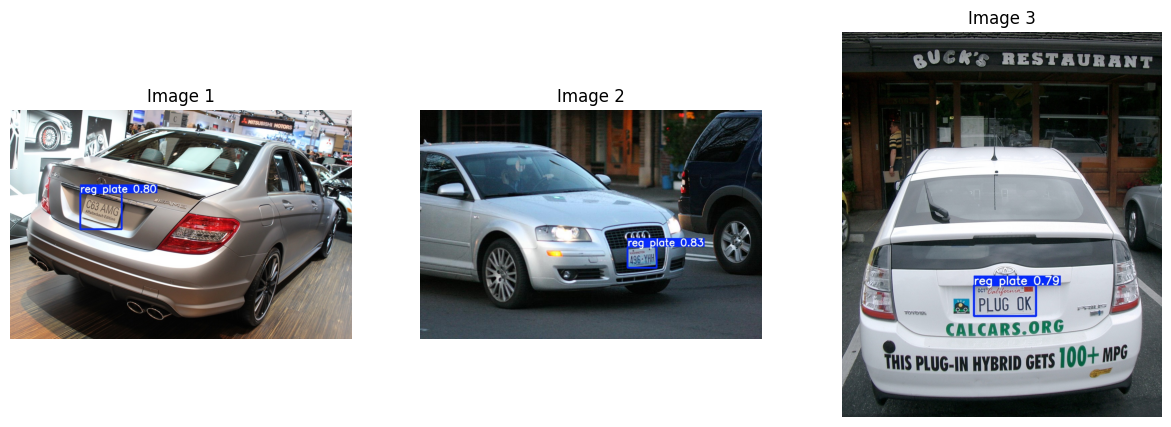

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Assuming your predicted images are in the following directory
image_dir = "runs/detect/exp" 

# List of image file names (replace with your actual image names)
image_files = ["003a5aaf6d17c917.jpg", "fa9147596edc058f.jpg", "ff85b09876d61631.jpg"]

# Create a figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate through the images and display them
for i, file in enumerate(image_files):
    image_path = os.path.join(image_dir, file)
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f"Image {i+1}")

# Show the plot
plt.show()

In [32]:
!python val.py --task 'val' --weights runs/train/exp/weights/best.pt --data data.yaml

val: data=data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /kaggle/working/datatset/validation/Vehicle registration plate.cac
                 Class     Images  Instances          P          R      mAP50   
                   all        386        512      0.914      0.916      0.939      0.673
Speed: 0.1ms pre-process, 6.7ms inference, 2.3ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp8


#  <font style="color:green">3. Inference [15 Points]</font> 

**You have to make predictions from your trained model on three images from the validation dataset.**

The plotted images should be similar to the following:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p1.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p2.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p3.png'>




#  <font style="color:green">4. COCO Detection Evaluation [25 Points]</font> 

**You have to evaluate your detection model on COCO detection evaluation metric.**

For your reference here is the coco evaluation metric chart:


---

<img src="https://www.learnopencv.com/wp-content/uploads/2020/03/c3-w9-coco_metric.png">

---

#### <font style="color:red">The expected `AP` (primary challenge metric) is more than `0.5`.</font>

**The expected output should look similar to the following:**

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.550
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.886
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.629
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.653
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.627
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.504
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.629
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.633
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.380
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.722
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.704
```



# <font style="color:green">5. Run Inference on a Video [15 Points]</font>

#### [Download the Input Video](https://www.dropbox.com/s/g88o4dx18zpgn8k/projet3-input-video.mp4?dl=1)

**You have to run inference on a video.** 

You can download the video from [here](https://www.dropbox.com/s/g88o4dx18zpgn8k/projet3-input-video.mp4?dl=1).

#### <font style="color:red">Upload the output video on youtube and share the link. Do not upload the video in the lab.</font>

In [28]:
!python detect.py --weights runs/train/exp/weights/best.pt --source '/kaggle/input/input-video'

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/input/input-video, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
video 1/1 (1/131) /kaggle/input/input-video/projet3-input-video.mp4: 384x640 (no detections), 33.5ms
video 1/1 (2/131) /kaggle/input/input-video/projet3-input-video.mp4: 384x640 (no detections), 10.0ms
video 1/1 (3/131) /kaggle/input/input-video/projet3-input-video.mp4: 384x640 (no detections), 10.0m

In [ ]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("18HWHCevFdU", width=640, height=360)
display(video)

**Your output video should have a bounding box around the vehicle registration plate.**

In [ ]:
video = YouTubeVideo("5SgCuee7AMs", width=640, height=360)
display(video)

**You can use the following sample code to read and write a video.**

In [ ]:
def video_read_write(video_path):
    """
    Read video frames one-by-one, flip it, and write in the other video.
    video_path (str): path/to/video
    """
    video = cv2.VideoCapture(video_path)
    
    # Check if camera opened successfully
    if not video.isOpened(): 
        print("Error opening video file")
        return
    
    # create video writer
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frames_per_second = video.get(cv2.CAP_PROP_FPS)
    num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    
    output_fname = '{}_out.mp4'.format(os.path.splitext(video_path)[0])
    
    output_file = cv2.VideoWriter(
        filename=output_fname,
        # some installation of opencv may not support x264 (due to its license),
        # you can try other format (e.g. MPEG)
        fourcc=cv2.VideoWriter_fourcc(*"x264"),
        fps=float(frames_per_second),
        frameSize=(width, height),
        isColor=True,
    )
    
        
    i = 0
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            
            output_file.write(frame[:, ::-1, :])
#             cv2.imwrite('anpd_out/frame_{}.png'.format(str(i).zfill(3)), frame[:, ::-1, :])
            i += 1
        else:
            break
        
    video.release()
    output_file.release()
    
    return